# Лабораторная работа №3. Краевая задача.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Запишем условия задачи:\
$ y" - P^2(x)y = f(x), \qquad P^2(x) = 10 + sin(2\pi x), \:\: f(x) = cos(2\pi x), \quad x \in [0; 1] $\
Используется разностная схема:\
$ \frac{y_1 - 2y_0 + y_{N - 1}}{h^2} - P^2(0)y_0 = f(0), $\
$ \frac{y_{n + 1} - 2y_n + y_{n - 1}}{h^2} - P^2(nh)y_n = f(nh), \:\: n \in [1, N - 2] \cap \mathbb{N}$\
$ \frac{y_0 - 2y_{N - 1} + y_{N - 2}}{h^2} - P^2(1 - h)y_{N - 1} = f(1 - h), \:\: Nh = 1 $

In [2]:
h = 0.005
N = int(1 / h)
x = np.linspace(0, 1, N)

# Functions P^2(x) and f(x)
def P2(x):
    return 10 + np.sin(2 * np.pi * x)

def f(x):
    return np.cos(2 * np.pi * x)

# Coefficients of the difference scheme
A_str  = np.array([1/(h**2) for n in range(N)])
C_str  = np.array([1/(h**2) for n in range(N)])
B_str  = np.array([-2/(h**2) - P2(n*h) for n in range(N)])
f_str  = np.array([f(n*h) for n in range(N)])

Так как имеем систему с циклическими граничными условиями, то будем использовать метод периодической прогонки:
1) Выполняем вначале прямую прогонку:\
$ \alpha_1 = - c_0/b_0, \qquad \beta_1 = f_0/b_0, \qquad \gamma_1 = - a_0/b_0 $\
$ \alpha_{k + 1} = \frac{- c_k}{b_k + \alpha_k a_k}, \qquad \beta_{k + 1} = \frac{f_k - \beta_k a_k}{b_k + \alpha_k a_k} \qquad \gamma_{k + 1} = \frac{- \gamma_k a_k}{b_k + \alpha_k a_k} $ 
3) Далее приступаем к обратной прогонке для получения коэффициентов:\
$ \mu_N = - \frac{c_N}{a_N(\alpha_N + \gamma_N) + b_N}, \qquad \nu_N = - \frac{f_N - a_N \beta_N}{a_N(\alpha_N + \gamma_N) + b_N}$\
$ \mu_{n - 1} = \alpha_n \mu_n + \gamma_n \mu_N, \qquad \nu_{n - 1} = \beta_n + \alpha_n \nu_n + \gamma_n \nu_N $ 
5) Наконец вычисляем $\vec{y}$ по формулам:\
$ y_0 = \frac{\nu_0}{1 - \mu_0}, \qquad y_{n} = \mu_{N - n} y_0 + \nu_{N - n}$

In [3]:
def periodic_tridiagonal_solver (A_trs, B_str, C_str, f_str):
        alpha = [0, - C_str[0] / B_str[0]]
        beta = [0,  f_str[0] / B_str[0]]
        gamma = [0, - A_str[0] / B_str[0]]
    
        n = len(f_str) - 1
    
        for i in range(1, n):
            denom = B_str[i] + alpha[i] * A_str[i]
            
            alpha.append(- C_str[i] / denom)
            beta.append((- beta[i] * A_str[i] + f_str[i]) / denom)
            gamma.append(- gamma[i] * A_str[i] / denom)
            
        denom = A_str[n] * (alpha[n] + gamma[n]) + B_str[n]

        mu = np.zeros(n + 1)
        nu = np.zeros(n + 1)
        mu[n] = - C_str[n] / denom
        nu[n] = (f_str[n] - A_str[n] * beta[n]) / denom
    
        for i in range(n - 1, -1, -1):
            mu[i] = alpha[i + 1] * mu[i + 1] + gamma[i + 1] * mu[n]
            nu[i] = alpha[i + 1] * nu[i + 1] + gamma[i + 1] * nu[n] + beta[i + 1]
            
        x = np.zeros(n + 1)
        x[0] = nu[0] / (1 - mu[0])
        for i in range(n, 0, -1):
            x[i] = mu[n - i] * x[0] + nu[n - i]
        return x


Промежуточные значения в узлах сетки (каждое 20-е):
x = 0.000, y = -0.020213
x = 0.101, y = -0.016030
x = 0.201, y = -0.005672
x = 0.302, y = 0.006885
x = 0.402, y = 0.016774
x = 0.503, y = 0.020199
x = 0.603, y = 0.015913
x = 0.704, y = 0.005607
x = 0.804, y = -0.006809
x = 0.905, y = -0.016662


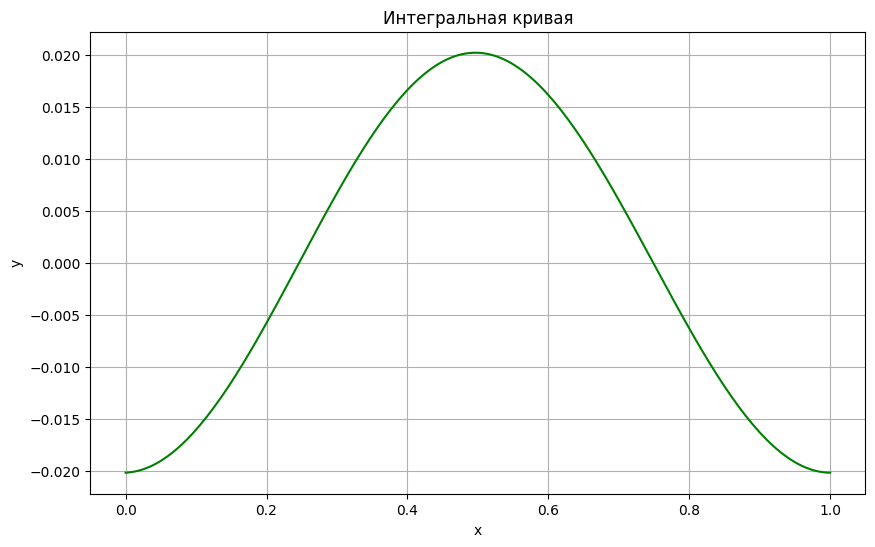

In [4]:
y = periodic_tridiagonal_solver(A_str, B_str, C_str, f_str)

print("Промежуточные значения в узлах сетки (каждое 20-е):")
for i in range(0, N, 20):
    print(f"x = {x[i]:.3f}, y = {y[i]:.6f}")

fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.plot(x, y, color='green' )
plt.title('Интегральная кривая')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()